In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc

import matplotlib.pyplot as plt

import statsmodels
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as smd
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
sns.set()

# EDA

In [6]:
data=pd.read_excel('data_innovation.xlsx')
data.head()

,Sales,growth_technological,growth_marketing,share_RD,share_equipments,patents,cooperation,support,lab,joint,climate,share_technology,emp,growth_innovation,fin_support
0,3.59,11.67,7.82,34.1,36.90,10,1,0,1,0,6,0.80,0.48,12.86,0.000000
1,1.28,2.34,4.70,27.1,16.56,1,0,0,0,0,10,0.02,0.46,2.29,0.000000
2,0.48,11.73,7.07,7.9,31.32,0,0,0,0,0,5,0.06,0.38,11.79,0.000000
3,0.86,9.01,3.91,19.0,16.29,3,0,0,0,0,5,0.31,0.10,8.95,0.000000
4,2.24,8.93,4.20,31.2,32.40,3,1,1,0,0,8,0.07,0.36,9.94,0.897416


In [7]:
data.shape

(1000, 15)

##Описание переменных
**Sales** - рост продаж инновационной продукции за один год;

**growth_innovation** - рост затрат на технологические, организационные и маркетинговые инновации за два года.

**growth_technological**- рост затрат на технологические инновации за два года;

**growth_marketing** - рост затрат на маркетинговые инновации за два года;

**dist** - расстояние от головной организации до центра города (населенного пункта), км;

**share_RD** - доля затрат на разработку новой продукции, услуг или методов производства в общем объеме затрат на технологические инновации (показатель приведен с трехлетним лагом);

**share_equipments** - доля затрат на приобретение машин и оборудования, связанных с инновациями, в общем объеме затрат на технологические инновации (показатель приведен с двухлетним лагом);

**patents** - количество поданных заявок на патенты на изобретения за последние 5 лет;

**cooperation** - участие приедприятия в программах кооперации в процессах реализации инноваций (0 – без участия, 1 – с участием);

**support** - участие компании в программах поддержки инновационной деятельности за последние три года (0 – без участия, 1 – с участием);

**lab** - наличие в компании отдела или лаборатории, занимающегося научными исследованиями и разработками (0-нет, 1-есть);

**month** – месяц рождения руководителя предприятия (1-12);

**joint** - участие компании за последние пять лет в совместных проектах, связанных с инновациями, с зарубежными предприятиями (0-нет, 1-есть);

**climate** - оценка предприятием условий для создания и распространения инноваций на рынке (10- максимум, 0 -минимум);

**share_technology** - доля затрат на приобретение технологий в неовеществлённой форме (патенты, лицензии) в общем объеме затрат на технологические инновации (с двухлетним лагом);

**emp** - изменение численности сотрудников на предприятии за два года

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sales                 1000 non-null   float64
 1   growth_technological  1000 non-null   float64
 2   growth_marketing      1000 non-null   float64
 3   share_RD              1000 non-null   float64
 4   share_equipments      1000 non-null   float64
 5   patents               1000 non-null   int64  
 6   cooperation           1000 non-null   int64  
 7   support               1000 non-null   int64  
 8   lab                   1000 non-null   int64  
 9   joint                 1000 non-null   int64  
 10  climate               1000 non-null   int64  
 11  share_technology      1000 non-null   float64
 12  emp                   1000 non-null   float64
 13  growth_innovation     1000 non-null   float64
 14  fin_support           1000 non-null   float64
dtypes: float64(9), int64(6

In [9]:
data.describe()

,Sales,growth_technological,growth_marketing,share_RD,share_equipments,patents,cooperation,support,lab,joint,climate,share_technology,emp,growth_innovation,fin_support
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.913540,6.823790,4.453800,24.937728,27.053726,1.688000,0.341000,0.007000,0.265000,0.141000,5.277000,0.320530,0.343880,7.369270,0.003920
std,1.980913,5.340042,1.391296,17.189609,18.381377,3.603837,0.474283,0.083414,0.441554,0.348196,2.713233,0.276389,0.299723,5.372921,0.053104
min,0.130000,0.090000,3.020000,-1.300000,0.810000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000
25%,0.747500,3.377500,3.670000,13.200000,12.847500,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.070000,0.120000,3.907500,0.000000
50%,1.280000,5.460000,4.080000,20.700000,22.860000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.240000,0.250000,5.960000,0.000000
75%,2.322500,8.805000,4.682500,32.025000,37.372500,0.000000,1.000000,0.000000,1.000000,0.000000,7.250000,0.510000,0.492500,9.382500,0.000000
max,24.040000,52.120000,15.610000,92.654850,89.100000,19.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.430000,52.110000,0.897416


In [10]:
data_describe = data.describe()
cols = np.array(data.columns)
mask = (data_describe.loc['max', :] == 1)
bin_cols = cols[mask]
print(bin_cols)
num_cols = cols[~mask]
print(num_cols)

['cooperation' 'support' 'lab' 'joint' 'share_technology']
['Sales' 'growth_technological' 'growth_marketing' 'share_RD'
 'share_equipments' 'patents' 'climate' 'emp' 'growth_innovation'
 'fin_support']


In [11]:
num_cols = np.append(num_cols[1:], bin_cols[-1])
bin_cols = bin_cols[:-1]
print(bin_cols)
print(num_cols)

['cooperation' 'support' 'lab' 'joint']
['growth_technological' 'growth_marketing' 'share_RD' 'share_equipments'
 'patents' 'climate' 'emp' 'growth_innovation' 'fin_support'
 'share_technology']


## Target

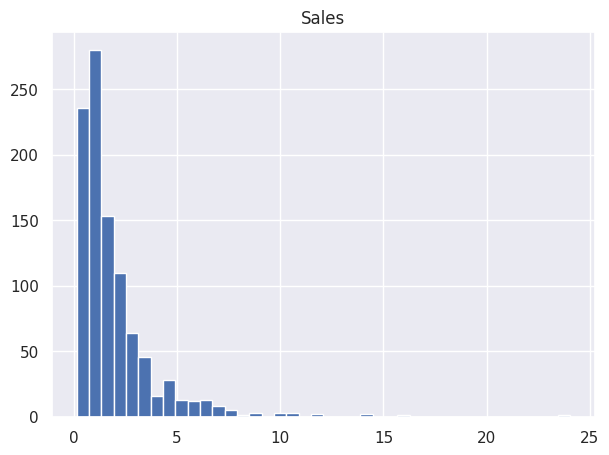

In [12]:
plt.figure(figsize=(7, 5))
plt.hist(data['Sales'], bins=40)
plt.title('Sales')
plt.show()

## Features

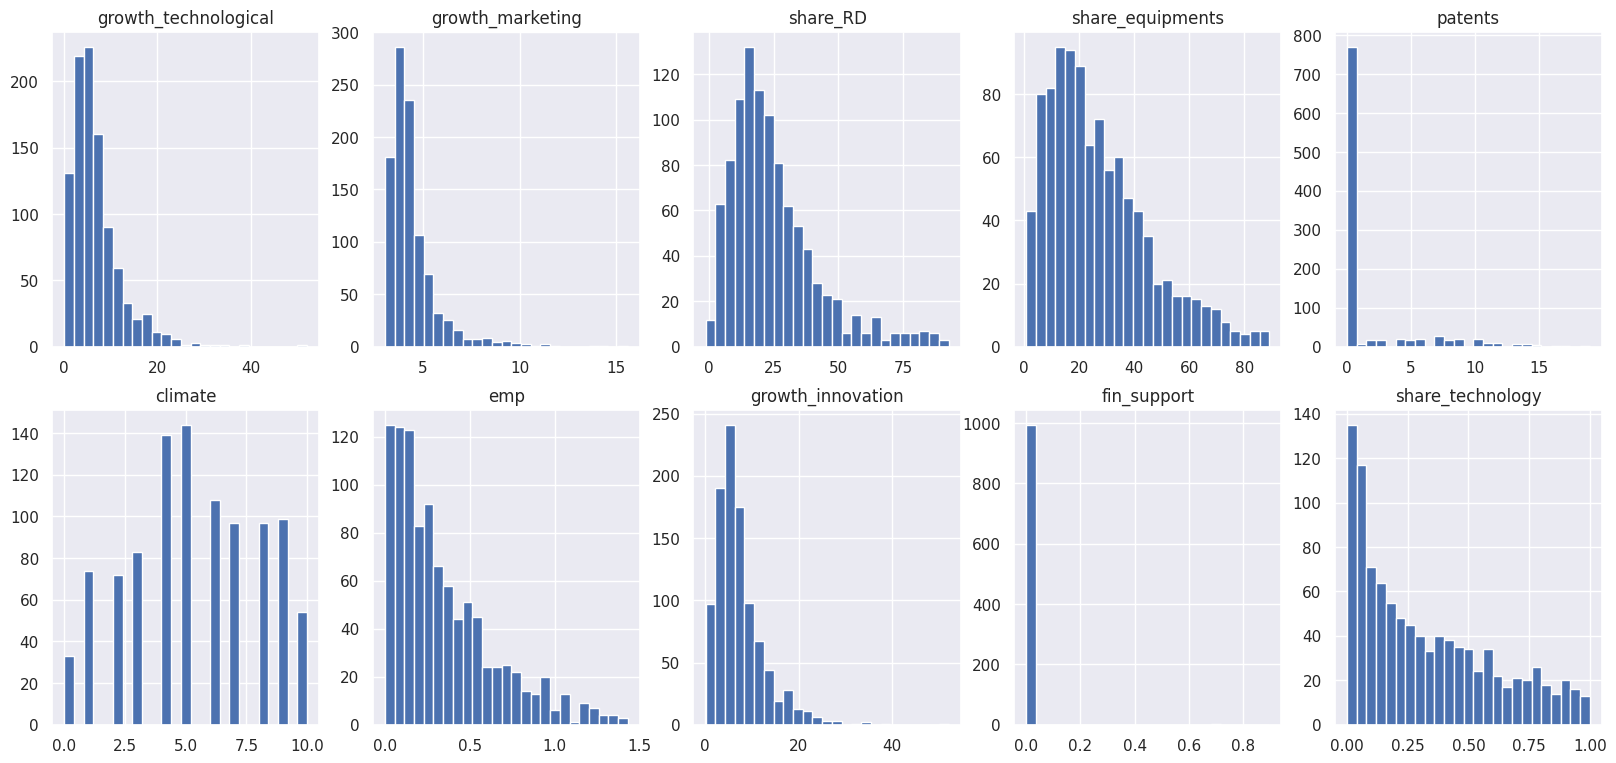

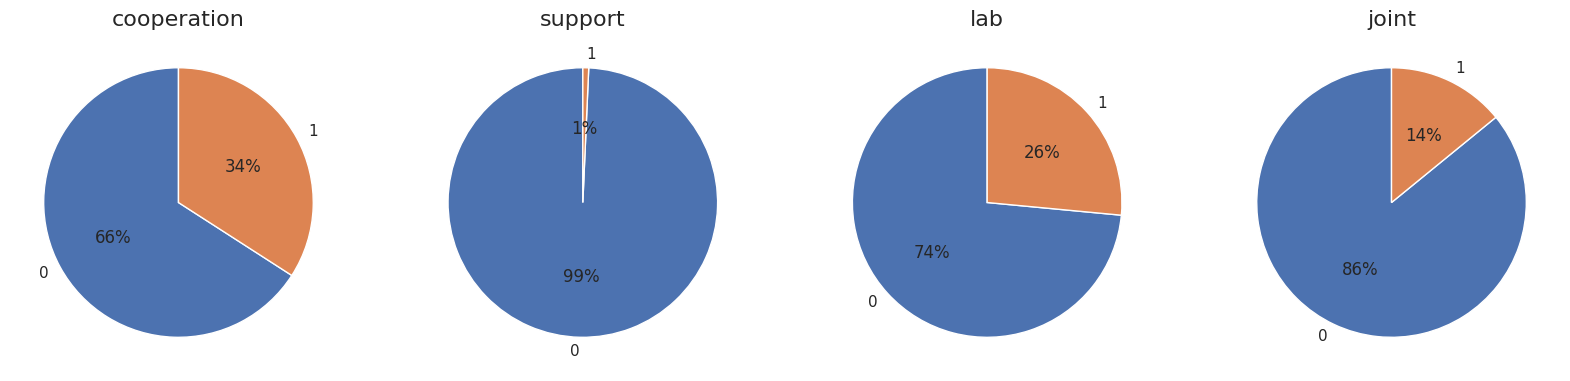

In [13]:
fig, ax = plt.subplots(2, 5, figsize=(20, 9))
ax = ax.ravel()
for i, col in enumerate(num_cols):
  ax[i].hist(data[col], bins=25)
  ax[i].set_title(col)
plt.show()

fig, ax = plt.subplots(1, 4, figsize=(20, 9))
for i, col in enumerate(bin_cols):
    column_values = data.groupby(col).size()
    ax[i].set_title(col, fontsize=16)
    ax[i].pie(column_values, labels = column_values.index, pctdistance=0.55, autopct='%.0f%%', startangle=90)
plt.show()


Выведем лучшие предприятия по показаетлю `Sales` топ 10 и худшие топ 10.

In [57]:
data.sort_values(by='Sales', ascending=False).head(10)

,Sales,growth_technological,growth_marketing,share_RD,share_equipments,patents,cooperation,support,lab,joint,climate,share_technology,emp,growth_innovation,fin_support
399,24.04,52.12,4.64,92.654850,80.370000,0,0,1,1,1,10,0.87,0.18,52.11,0.232955
75,16.22,38.28,4.26,35.979823,16.213689,4,1,1,1,1,8,0.25,0.44,38.54,0.684841
126,14.40,33.77,4.33,41.712305,31.096920,0,1,1,1,1,7,0.90,0.43,33.83,0.511210
929,14.02,33.19,4.92,35.267253,26.894352,0,0,0,1,1,6,0.28,0.10,33.82,0.000000
998,11.71,28.44,3.80,43.627365,14.205606,0,0,0,1,1,10,0.75,0.26,29.09,0.000000
207,11.57,31.29,4.34,34.009762,20.220974,0,0,1,1,1,5,0.33,0.76,32.09,0.710992
648,10.66,23.43,3.88,32.863563,18.666231,0,1,0,1,1,8,0.71,0.34,24.49,0.000000
580,10.64,24.34,4.16,45.953073,10.869856,0,0,0,1,1,9,0.76,0.48,24.59,0.000000
435,10.41,27.32,4.40,36.269378,25.871790,0,0,0,1,1,8,0.36,0.53,28.31,0.000000
630,10.26,23.17,3.96,77.900000,20.779902,5,0,0,1,1,9,0.52,0.05,23.24,0.000000


In [58]:
data.sort_values(by='Sales').head(10)

,Sales,growth_technological,growth_marketing,share_RD,share_equipments,patents,cooperation,support,lab,joint,climate,share_technology,emp,growth_innovation,fin_support
407,0.13,0.24,8.14,3.2,1.71,0,1,0,0,0,4,0.66,0.71,0.24,0.0
287,0.17,0.12,3.29,12.6,2.34,0,0,0,0,0,1,0.15,0.15,0.36,0.0
123,0.18,5.36,3.16,5.8,6.57,0,0,0,0,0,1,0.22,0.19,5.83,0.0
999,0.20,1.61,3.70,12.3,68.49,0,1,0,0,0,0,0.05,0.39,2.58,0.0
628,0.20,4.59,4.09,9.9,12.78,0,0,0,0,0,3,0.21,0.15,4.77,0.0
678,0.20,9.83,4.35,12.2,0.81,0,0,0,0,0,3,0.02,0.17,10.43,0.0
307,0.23,2.96,3.54,15.3,1.26,5,0,0,0,0,1,0.50,0.20,3.10,0.0
596,0.24,1.93,3.40,-1.3,19.08,0,0,0,0,0,0,0.42,0.34,2.02,0.0
355,0.25,8.10,4.15,4.4,21.60,0,0,0,0,0,1,0.02,0.05,8.37,0.0
873,0.25,4.61,3.52,13.1,3.87,0,1,0,0,0,1,0.28,0.01,4.55,0.0


Из анализа топов, видно что лучшие топовые компании иммеют `lab`, `joint` = 1, то есть иммеют научные лаборатории и занимались кооперацией с иностранными предприятиями, а у "слабых" компаний данные признаки 0. Так же видно, большая разница в `growth_technological`, `growth_innovation`, `share_RD`, `share_equipments` между успешными и нет компаниями. Это, в принице логично, больше прибыли - больше затрат на развитие. `climate` высок у лучших и низок у слабых (более менее трезво себя каждый оценивает).

`growth_marketing`, `patents` не дают какой-то очевидной корреляции, патенты есть у хороших и плохих компаний, маркетинг любят там и там, но плохие компании как-то плохо его используют.

Покатель `support` максимально дисбалансный (99 и 1). Надо на него лучше посмотреть.

In [59]:
data[data['support'] == 1]

,Sales,growth_technological,growth_marketing,share_RD,share_equipments,patents,cooperation,support,lab,joint,climate,share_technology,emp,growth_innovation,fin_support
4,2.24,8.93,4.20,31.200000,32.400000,3,1,1,0,0,8,0.07,0.36,9.94,0.897416
9,1.18,7.67,3.90,59.000000,26.010000,0,0,1,0,0,9,0.30,0.47,7.95,0.858183
12,2.89,19.76,6.50,30.200000,44.100000,0,1,1,1,0,6,0.38,0.13,20.45,0.024418
75,16.22,38.28,4.26,35.979823,16.213689,4,1,1,1,1,8,0.25,0.44,38.54,0.684841
126,14.40,33.77,4.33,41.712305,31.096920,0,1,1,1,1,7,0.90,0.43,33.83,0.511210
207,11.57,31.29,4.34,34.009762,20.220974,0,0,1,1,1,5,0.33,0.76,32.09,0.710992
399,24.04,52.12,4.64,92.654850,80.370000,0,0,1,1,1,10,0.87,0.18,52.11,0.232955


Неоднозначный показатель, есть как и у топовых, так и у средних.

## Correlation matrix

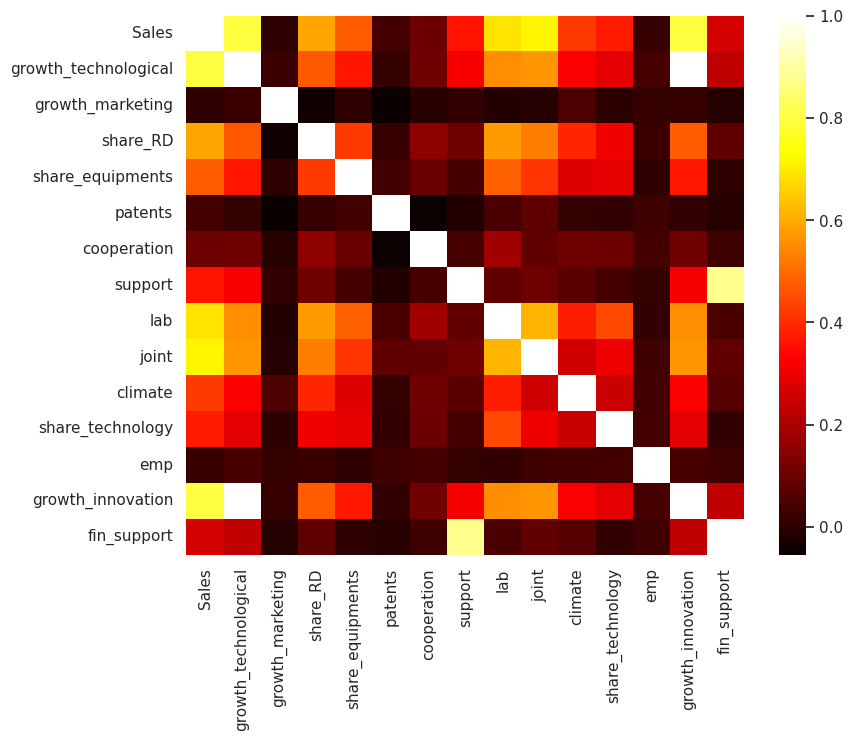

In [14]:
plt.figure(figsize=(9, 7))
sns.heatmap(data.corr(), cmap='hot')
plt.show()

Видно что, `growth_technological`, `growth_innovation` сильно коррелируют c `Sales`.`joint` и `lab` тоже достаточно похожи, так как оба признака часто встречались только у топовых компаний и не встречались у слабых. С ними же коррелируют затраты на технологические инновации. `fin_support` и `support` сильно коррелирую. Совсем почти ни с чем не коррелируют `growth_marketing`, `patents`, `eml`.

# VIF multicollinearity

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [16]:
df = data.drop('Sales', axis=1)
norm_df_mms = MinMaxScaler().fit_transform(df)
vif = pd.DataFrame()
vif['features'] = df.columns
vif['VIF'] = [variance_inflation_factor(norm_df_mms, i) for i in range (norm_df_mms.shape[1])]
vif.sort_values('VIF', ascending=False)

,features,VIF
12,growth_innovation,504.564123
0,growth_technological,470.433884
2,share_RD,5.548740
9,climate,5.367319
6,support,4.834295
13,fin_support,4.558213
3,share_equipments,4.065209
7,lab,2.942524
10,share_technology,2.890193
8,joint,2.203887


In [17]:
norm_df_sc = StandardScaler().fit_transform(df)
vif = pd.DataFrame()
vif['features'] = df.columns
vif['VIF'] = [variance_inflation_factor(norm_df_sc, i) for i in range (norm_df_sc.shape[1])]
vif.sort_values('VIF', ascending=False)

,features,VIF
0,growth_technological,210.635533
12,growth_innovation,210.527260
6,support,4.818231
13,fin_support,4.536737
7,lab,2.330843
8,joint,1.977122
2,share_RD,1.767511
3,share_equipments,1.408088
10,share_technology,1.278384
9,climate,1.273329


Хоть и разные скалеры дают разное ранжирование и значение VIF, общее у них то, что признаки `growth_innovation`, `growth_technological` обладают значением VIF > 200, что дает звоночек о сильной мультиколлинеарности, остальные же признаки имееют VIF <= 5, что в пределах нормы.

# Регрессионный анализ

In [116]:
cols = list(data.columns)[1:]
n1 = smf.ols(f'Sales ~ {" + ".join(map(str, cols))}', data=data)
fitted=n1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     317.6
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        18:56:17   Log-Likelihood:                -1248.3
No. Observations:                1000   AIC:                             2527.
Df Residuals:                     985   BIC:                             2600.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.2522 

Исключим  признаки, для которых 0 принадлежит отрезку ([0.025, 0.975]), то есть: `growth_marketing`, `patents`, `share_technology`, `emp`, `growth_innovation`.

In [118]:
data.columns

Index(['Sales', 'growth_technological', 'growth_marketing', 'share_RD',
       'share_equipments', 'patents', 'cooperation', 'support', 'lab', 'joint',
       'climate', 'share_technology', 'emp', 'growth_innovation',
       'fin_support'],
      dtype='object')

In [119]:
cols = list(data.columns)[1:]
n1 = smf.ols(f'Sales ~ growth_technological + share_RD + share_equipments + cooperation + support + lab + joint + climate + fin_support', data=data)
fitted=n1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     493.6
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        19:11:47   Log-Likelihood:                -1250.8
No. Observations:                1000   AIC:                             2522.
Df Residuals:                     990   BIC:                             2571.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.2841 

Сделаем таргет логарифмическим.

In [120]:
cols = list(data.columns)[1:]
n1 = smf.ols(f'np.log(Sales) ~ growth_technological + share_RD + share_equipments + cooperation + support + lab + joint + climate + fin_support', data=data)
fitted=n1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(Sales)   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     462.4
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        19:12:52   Log-Likelihood:                -394.50
No. Observations:                1000   AIC:                             809.0
Df Residuals:                     990   BIC:                             858.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.9686 

Еще можно убрать `cooperation`, `support`, `fin_support`.

In [121]:
cols = list(data.columns)[1:]
n1 = smf.ols(f'np.log(Sales) ~ growth_technological + share_RD + share_equipments + lab + joint + climate', data=data)
fitted=n1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(Sales)   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     693.6
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        19:14:35   Log-Likelihood:                -395.72
No. Observations:                1000   AIC:                             805.4
Df Residuals:                     993   BIC:                             839.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.9725 

# Тест Бройша-Пагана

In [126]:
test = sms.het_breuschpagan(fitted.resid, fitted.model.exog)
names = ['Lagrange multiplier statistic: ', 'p-value of lagrange multiplier test:  ', 'f-value: ', 'f p-value:  ']
for name, test in zip(names, test):
    print(name, test)

Lagrange multiplier statistic:  53.70953486054519
p-value of lagrange multiplier test:   8.442112751052881e-10
f-value:  9.393445614090883
f p-value:   4.79083946661161e-10


p-value < 0.05, поэтому отбрасываем нулевую гипотезу, значит есть  гетероскедастичность

# Тест Уайта

In [128]:
white_test = sms.het_white(fitted.resid, fitted.model.exog)
names = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
for name, test in zip(names, white_test):
    print(name, test)

Test Statistic 101.10353823609108
Test Statistic p-value 4.0871183199307225e-11
F-Statistic 4.382032878345746
F-Test p-value 8.808724492046505e-12


Аналогично, есть гетероскедастичность.

# Model selection

In [27]:
from sklearn.datasets import make_regression
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [52]:
from sklearn.decomposition import PCA

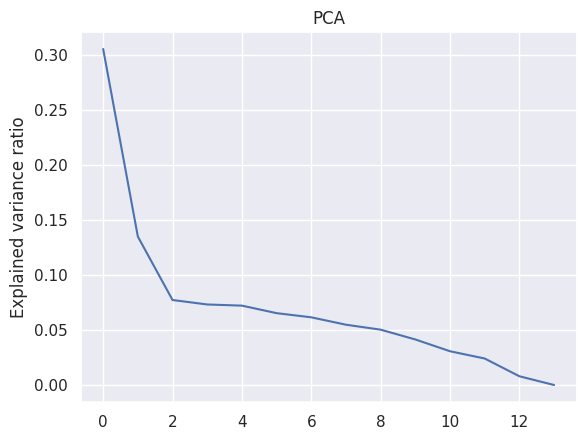

In [109]:
pca = PCA()
pca.fit(norm_df_sc)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained variance ratio')
plt.title('PCA')
plt.show()

После PCA преобразвания можно отсечь 3 признака, но мы это не будем делать, потому что будем использовать регуляризацию (хотя это не причина так делать).

In [134]:
X, y = norm_df_sc, data['Sales']
lasso = LassoCV()
lasso_score = np.mean(cross_val_score(lasso, X, y, cv=4))

ridge = RidgeCV()
ridge_score = np.mean(cross_val_score(ridge, X, y, cv=4))

lr = LinearRegression()
lr_score = np.mean(cross_val_score(lr, X, y, cv=4))

y_lg = np.log(y)
lasso_lg = LassoCV()
lasso_lg_score = np.mean(cross_val_score(lasso_lg, X, y_lg, cv=4))

ridge_lg = RidgeCV()
ridge_lg_score = np.mean(cross_val_score(ridge_lg, X, y_lg, cv=4))

lr_lg = LinearRegression()
lr_lg_score = np.mean(cross_val_score(lr_lg, X, y_lg, cv=4))

In [135]:
cv_results = pd.DataFrame()
cv_results['model'] = pd.Series(['LassoCV', 'RidgeCV', 'LinearRegression', 'LassoCV_lg', 'RidgeCV_lg', 'LinearRegression_lg',])
cv_results['R^2'] = pd.Series([lasso_score, ridge_score, lr_score, lasso_lg_score, ridge_lg_score, lr_lg_score])
cv_results.sort_values(by='R^2', ascending=False)

,model,R^2
3,LassoCV_lg,0.804117
5,LinearRegression_lg,0.790139
4,RidgeCV_lg,0.789779
0,LassoCV,0.666740
1,RidgeCV,0.598248
2,LinearRegression,0.597226


Из таблицы выше, лучшей моделью является Lasso с логарифмическим таргетом. Интересно посмотеть на веса в этой моделе.

# Best model with Reg.

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y_lg, train_size=0.8, random_state=41)
model = LassoCV()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8219422306143768


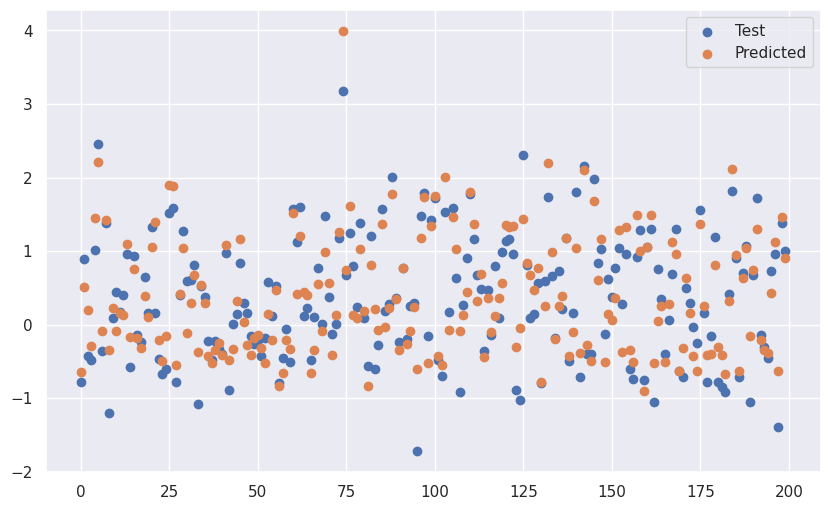

In [139]:
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(y_test)), y_test, label='Test')
plt.scatter(np.arange(len(y_test)), model.predict(X_test), label='Predicted')
plt.legend()
plt.show()

В целом неплохо, можно покалдовать с параметром регуляриции и признаками, чтобы улучшить результат (но мы это делать не будем).

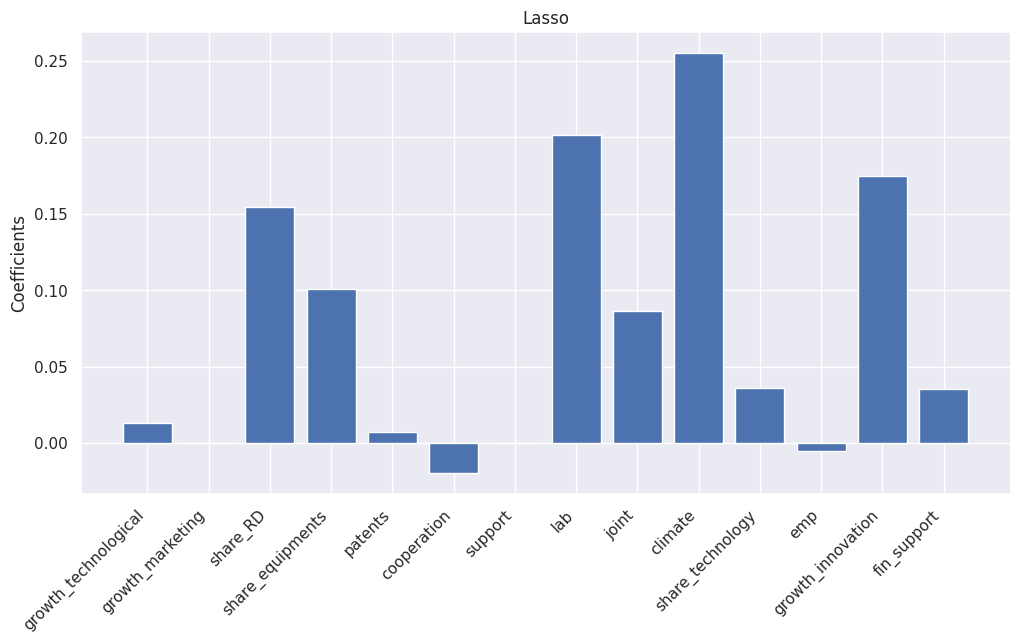

In [97]:
coef = model.coef_
cols = list(data.columns)[1:]
plt.figure(figsize=(12, 6))
plt.bar(cols, coef)#, label=bar_labels, color=bar_colors)
plt.ylabel('Coefficients')
plt.title('Lasso')
plt.xticks(rotation=45, ha='right')
plt.show()

Как и ожидалось, модель с L1 регуляризацией увидела малозначимость таких признаков как: `growth_marketing`, `patents`, `emp`. Так же увидела мультиколлинеарность между `growth_technological` и `growth_innovation` и занизила первое, заметила корреляцию `support` и `fin_support` и убрала первое. Хоть и `lab`, `joint` дастоточно хорошо коррелируют, модель решила их оба оставить. При этом наиболее значимые признаки отличаются от тех, который выявил пошаговый регрессионный анализ.

# Best regression model

Попробуем убрать лишние признаки, выявленные из пошагового регрессионного анализа

In [131]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(Sales)   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     693.6
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        19:41:03   Log-Likelihood:                -395.72
No. Observations:                1000   AIC:                             805.4
Df Residuals:                     993   BIC:                             839.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.9725 

0.8295517263587255


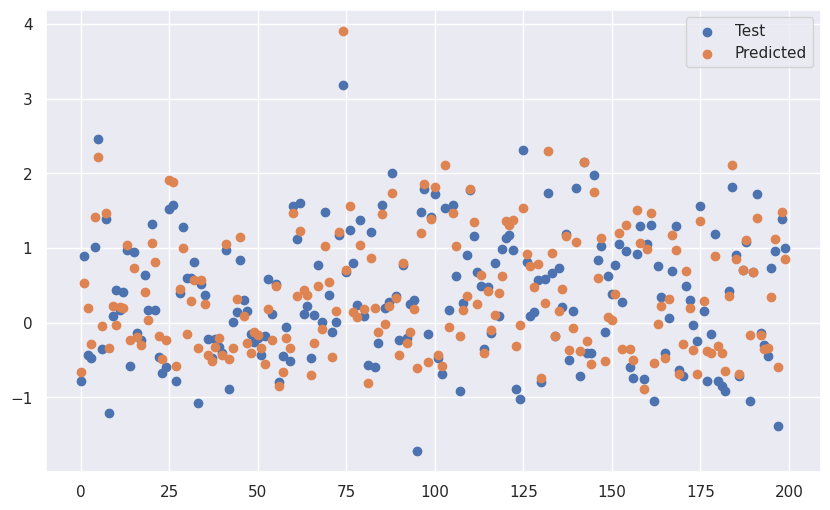

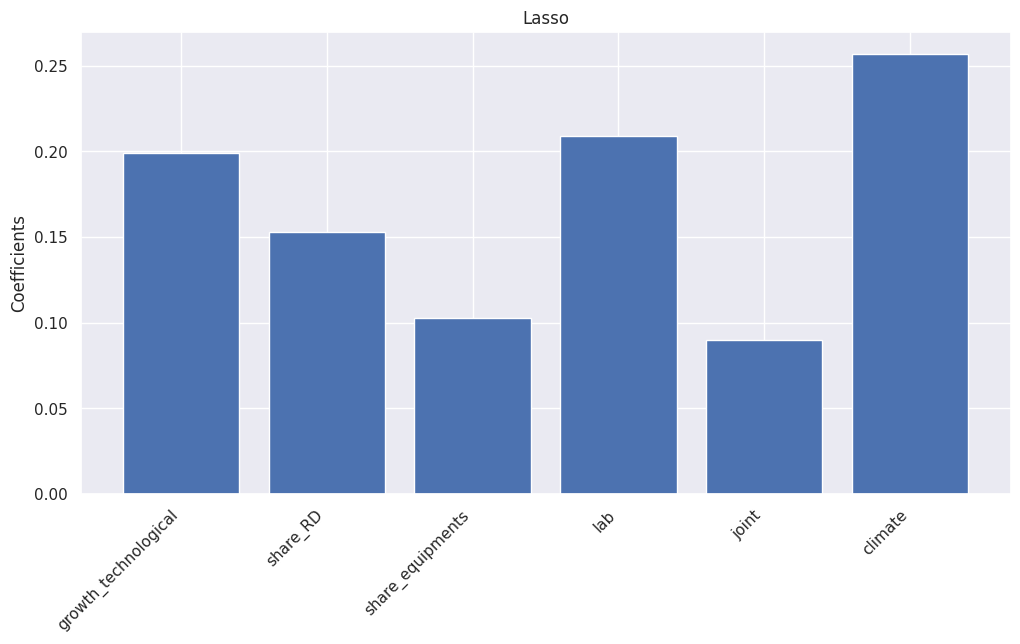

In [130]:
new_cols = ['growth_technological', 'share_RD', 'share_equipments', 'lab', 'joint', 'climate']
X_new = StandardScaler().fit_transform(data[new_cols])
X_train, X_test, y_train, y_test = train_test_split(X_new, y_lg, train_size=0.8, random_state=41)
model = LassoCV()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(y_test)), y_test, label='Test')
plt.scatter(np.arange(len(y_test)), model.predict(X_test), label='Predicted')
plt.legend()
plt.show()

coef = model.coef_
cols = list(data.columns)[1:]
plt.figure(figsize=(12, 6))
plt.bar(new_cols, coef)#, label=bar_labels, color=bar_colors)
plt.ylabel('Coefficients')
plt.title('Lasso')
plt.xticks(rotation=45, ha='right')
plt.show()

R2 стал выше почти на 0.01 - неплохо.

# Вывод

По итогам данной работы было выявлено, что наилучшая модель на предоставленных наборах данных это дефолтная LassoCV (L1 reg) из sklearn, объясняющая 83% дисперсии данных.